<a href="https://colab.research.google.com/github/emreakbulut06/YSA_Final_Odevi/blob/main/YapaySinirAglariFinal2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Veri işleme kütüphaneleri
import pandas as pd
import numpy as np

# Model oluşturma, veri ayırma ve performans metrikleri için
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
"""# Kaggle API anahtarını yükleme
import os
os.makedirs("~/.kaggle", exist_ok=True)
!mv kaggle.json ~/.kaggle/  # JSON dosyasını aynı dizinde olduğundan emin olun
!chmod 600 ~/.kaggle/kaggle.json  # API anahtarına gerekli izinleri ver"""

'# Kaggle API anahtarını yükleme\nimport os\nos.makedirs("~/.kaggle", exist_ok=True)\n!mv kaggle.json ~/.kaggle/  # JSON dosyasını aynı dizinde olduğundan emin olun\n!chmod 600 ~/.kaggle/kaggle.json  # API anahtarına gerekli izinleri ver'

In [19]:
"""# Kaggle'dan Face Mask Detection veri setini indirme
!kaggle datasets download -d omkargurav/face-mask-dataset
!unzip face-mask-dataset.zip -d face_mask_dataset"""

"# Kaggle'dan Face Mask Detection veri setini indirme\n!kaggle datasets download -d omkargurav/face-mask-dataset\n!unzip face-mask-dataset.zip -d face_mask_dataset"

In [14]:
import os

# Veri seti yolu
base_path = "face_mask_dataset/data"

# 'with_mask' ve 'without_mask' klasörlerinin altındaki tüm resim dosyalarını almak
image_paths = []
labels = []

# 'with_mask' ve 'without_mask' klasörlerindeki dosyaların yollarını listeleyelim
for label in ['with_mask', 'without_mask']:
    folder_path = os.path.join(base_path, label)
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):  # Eğer resim dosyası ise
            image_paths.append(os.path.join(folder_path, filename))
            labels.append(label)  # Etiket olarak klasör adını alıyoruz

# Toplam yol ve etiket sayısını kontrol edelim
print(f"Toplam resim sayısı: {len(image_paths)}")
print(f"Toplam etiket sayısı: {len(labels)}")

Toplam resim sayısı: 7553
Toplam etiket sayısı: 7553


In [15]:
from sklearn.model_selection import train_test_split

# Eğitim/validasyon (%80) ve test (%20) verilerinin ayrılması
train_val_paths, test_paths, train_val_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

# Eğitim ve validasyon verisini %80 eğitim ve %20 validasyon olarak bölelim
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_val_paths, train_val_labels, test_size=0.2, random_state=42, stratify=train_val_labels
)

# Eğitim/validasyon yollarını kontrol edelim
print(f"Eğitim yolları: {len(train_paths)}")
print(f"Validasyon yolları: {len(val_paths)}")

Eğitim yolları: 4833
Validasyon yolları: 1209


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri arttırımı için ImageDataGenerator kullanımı
datagen = ImageDataGenerator(
    rescale=1./255,  # Görüntüleri [0, 1] aralığına normalize et
    rotation_range=10,  # Rastgele döndürme
    width_shift_range=0.1,  # Genişlik kaydırma
    height_shift_range=0.1,  # Yükseklik kaydırma
    shear_range=0.1,  # Eğim dönüşümü
    zoom_range=0.1,  # Yakınlaştırma
    horizontal_flip=True,  # Yatay çevirme
    fill_mode='nearest',  # Boşlukları doldurma
    validation_split=0.2  # Eğitim verisinin %20'sini validasyon için ayır
)

# Eğitim veri generator'ı
train_generator = datagen.flow_from_directory(
    base_path,  # Ana klasör
    target_size=(224, 224),  # Görüntü boyutunu ayarlama
    batch_size=32,  # Her seferinde 32 örnek
    class_mode='categorical',  # Etiketler kategorik
    subset='training',  # Eğitim verisi
    shuffle=True  # Veriyi karıştır
)

# Validasyon veri generator'ı
val_generator = datagen.flow_from_directory(
    base_path,  # Ana klasör
    target_size=(224, 224),  # Görüntü boyutunu ayarlama
    batch_size=32,  # Her seferinde 16 örnek
    class_mode='categorical',  # Etiketler kategorik
    subset='validation',  # Validasyon verisi
    shuffle=False  # Validasyon verisi sıralı olmalı
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 49/188 ━━━━━━━━━━━━━━━━━━━━ 1:08 492ms/step - accuracy: 0.6857 - loss: 0.6119

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


188/188 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.7619 - loss: 0.5124 - val_accuracy: 0.6509 - val_loss: 4.2913 - learning_rate: 0.0010
Epoch 2/20
  1/188 ━━━━━━━━━━━━━━━━━━━━ 59s 317ms/step - accuracy: 0.8750 - loss: 0.2397

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.8750 - loss: 0.2397 - val_accuracy: 0.6669 - val_loss: 4.1565 - learning_rate: 0.0010
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 752ms/step - accuracy: 0.8891 - loss: 0.2748 - val_accuracy: 0.7819 - val_loss: 0.5007 - learning_rate: 0.0010
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.8750 - loss: 0.2469 - val_accuracy: 0.7686 - val_loss: 0.5311 - learning_rate: 0.0010
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 757ms/step - accuracy: 0.9125 - loss: 0.2278 - val_accuracy: 0.5213 - val_loss: 0.9208 - learning_rate: 0.0010
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.9062 - loss: 0.2502 - val_accuracy: 0.5352 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 203s 866ms/step - accuracy: 0.9370 - loss: 0.1688 - val_accuracy: 0.8956 - val_loss: 0.3291 - learning_rate: 0.0010
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 97ms/step - accuracy: 0.9688 - loss

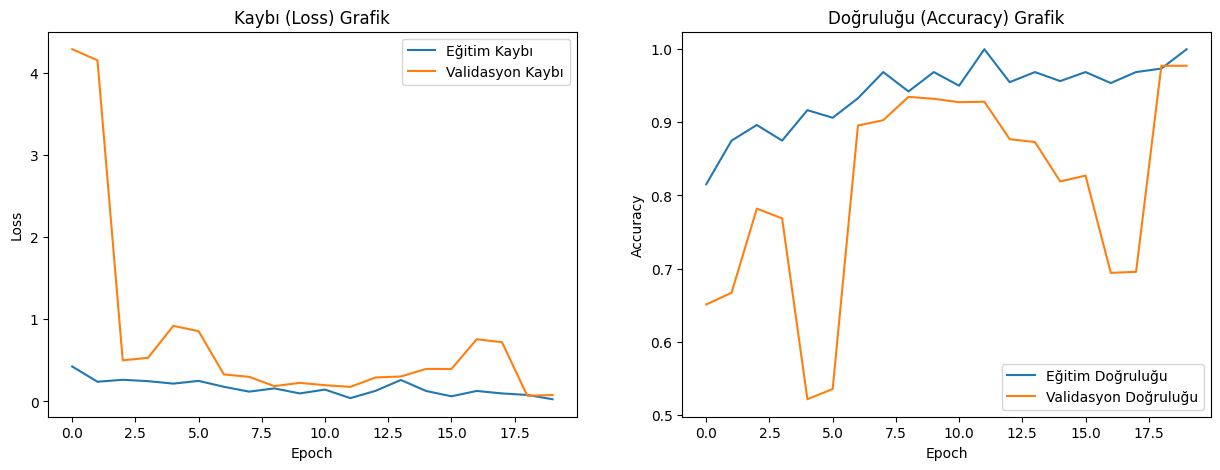

In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Modelinizi derleyin (örnek olarak DenseNet121 modelini kullandık)
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model


# Base model (pre-trained DenseNet121)
base_model = DenseNet121(weights=None, include_top=False, input_shape=(224, 224, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Modeli derleyelim
optimizer = Adam(learning_rate=0.001)  # Başlangıç öğrenme hızı
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint

# Model ağırlıklarını en iyi epoch'ta kaydeden callback
checkpoint = ModelCheckpoint(
    'best.weights.h5',  # Kaydedilecek dosya adı
    monitor='val_loss',  # Hangi metriği takip edeceğiz
    save_best_only=True,  # Sadece en iyi modeli kaydet
    mode='min',  # En düşük validation loss en iyi modeldir
    verbose=1  # Kaydedildiğinde bilgi versin
)


# EarlyStopping ve ReduceLROnPlateau callback'lerini ayarlıyoruz
early_stopping = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

# Eğitim sırasında en iyi ağırlıkları kaydedelim
model.save_weights('best.weights.h5')  # En iyi ağırlıkları kaydediyoruz



# Eğitim veri generator'ı ile model eğitimi
history = model.fit(
    train_generator,  # Eğitim veri generator'ı
    steps_per_epoch=train_generator.samples // 32,  # Eğitim verisi için adım sayısı
    epochs=20,  # Maksimum epoch sayısı
    validation_data=val_generator,  # Validasyon veri generator'ı
    validation_steps=val_generator.samples // 32,  # Validasyon verisi için adım sayısı
    callbacks=[early_stopping, reduce_lr],  # Callbacks (Early Stopping, Learning Rate Reducing)
)

# Eğitim ve validasyon kaybı ve doğruluğunu çizdirme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Kaybı çizdirme
ax1.plot(history.history['loss'], label='Eğitim Kaybı')
ax1.plot(history.history['val_loss'], label='Validasyon Kaybı')
ax1.set_title('Kaybı (Loss) Grafik')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Doğruluğu çizdirme
ax2.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
ax2.plot(history.history['val_accuracy'], label='Validasyon Doğruluğu')
ax2.set_title('Doğruluğu (Accuracy) Grafik')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

Found 7553 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 738 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


7553/7553 ━━━━━━━━━━━━━━━━━━━━ 107s 13ms/step
Accuracy: 0.5068
Precision: 0.5068
Recall: 1.0000
Specificity: 0.0000
F1-score: 0.6727
AUC: 0.4141


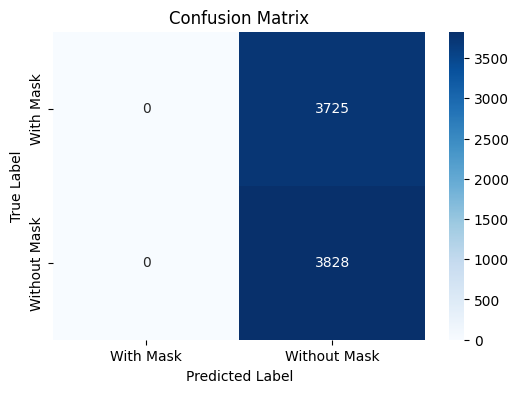

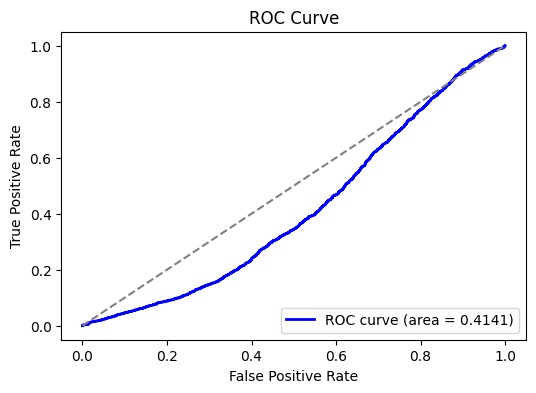

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Modeli yükle
model.load_weights('best.weights.h5')

# Test veri setini hazırla (test seti %20 olarak ayrılmıştı)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'face_mask_dataset/data',
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Tahminleri yap
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion Matrix hesapla
conf_matrix = confusion_matrix(y_true, y_pred)

# Metrikleri hesapla
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
specificity = conf_matrix[0,0] / (conf_matrix[0,0] + conf_matrix[0,1])
f1 = f1_score(y_true, y_pred)

# ROC Eğrisi ve AUC hesapla
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Sonuçları yazdır
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Confusion Matrix çizdir
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['With Mask', 'Without Mask'], yticklabels=['With Mask', 'Without Mask'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC Eğrisi çizdir
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
